1.    Install pydrive2



In [ ]:
!pip install pydrive2

2. Akses data

In [ ]:
from pydrive2.auth import GoogleAuth

from pydrive2.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

In [ ]:
fileDownloaded = drive.CreateFile({'id':'1P3MClXDlUByWEv822qYT9qk75rCzx1jv'})

3. Download data set

In [ ]:
folder_id = '1P3MClXDlUByWEv822qYT9qk75rCzx1jv'
target_filename = 'Dataset NBA.csv'
file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()

found = False

for file in file_list:
  if file['title'] == target_filename:
    print(f" Download File : {file ['title']} ....")
    file.GetContentFile(file['title'])
    print(f" Download Selesai")
    found = True
    break

if not found:
  print(f"File '{target_filename}' tidak ditemukan.")

 Download File : Dataset NBA.csv ....
 Download Selesai


4. Import Library

*   NumPy untuk membantu perhitungan angka-angka dan memproses data dalam bentuk array.

*   Pandas membantu membaca dataset dan mengelola data dalam bentuk tabel, supaya mudah dianalisis.

*   Matplotlib dan Seaborn membuat grafik, agar hasil data dan model lebih mudah dipahami secara visual.

*   Library scikit-learn untuk membangun model logistic regression, melakukan pembagian data, standarisasi, dan mengevaluasi hasil model dengan metrik seperti akurasi, presisi, recall, dan confusion matrix.

*   Warning agar output terlihat lebih rapi.







In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

5. Memangil dataset dan menampilkan dataframe

In [ ]:
df = pd.read_csv('Dataset NBA.csv')
df.head()


,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Awards,Player-additional,Season Type,PER,Adjusted Salary
0,1,Joel Embiid,28,PHI,C,66.0,66.0,34.6,11.0,20.1,...,1.0,1.7,3.4,3.1,33.1,MVP-1DPOY-9CPOY-5ASNBA1,embiijo01,Regular,31.4,35605377.25
1,2,Luka Dončić,23,DAL,PG,66.0,66.0,36.2,10.9,22.0,...,1.4,0.5,3.6,2.5,32.4,MVP-8CPOY-8ASNBA1,doncilu01,Regular,28.7,39290951.43
2,3,Damian Lillard,32,POR,PG,58.0,58.0,36.3,9.6,20.7,...,0.9,0.3,3.3,1.9,32.2,CPOY-10ASNBA3,lillada01,Regular,26.7,45006144.50
3,4,Shai Gilgeous-Alexander,24,OKC,PG,68.0,68.0,35.5,10.4,20.3,...,1.6,1.0,2.8,2.8,31.4,MVP-5CPOY-7ASNBA1,gilgesh01,Regular,27.2,32742459.52
4,5,Giannis Antetokounmpo,28,MIL,PF,63.0,63.0,32.1,11.2,20.3,...,0.8,0.8,3.9,3.1,31.1,MVP-3DPOY-6ASNBA1,antetgi01,Regular,29.0,45006144.50


6. Ringkasan Statistik Kolom Numerik

In [ ]:
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Adjusted Salary
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,...,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,8.960000e+02
mean,284.054688,26.273438,34.770089,16.146205,19.498884,3.235826,6.957924,0.453565,0.989397,2.790848,...,2.616741,3.455692,1.979687,0.589509,0.372656,1.058594,1.652455,8.820312,12.515402,9.545675e+06
std,199.758665,4.364152,26.484540,23.653831,10.455678,2.542242,5.220315,0.132219,0.894995,2.309452,...,1.882299,2.496516,1.962165,0.430151,0.400837,0.870108,0.865086,7.088298,7.877857,1.133050e+07
min,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.500000,6.195000e+03
25%,112.750000,23.000000,8.000000,0.000000,11.500000,1.400000,3.100000,0.406000,0.200000,0.900000,...,1.300000,1.600000,0.700000,0.300000,0.100000,0.500000,1.000000,3.700000,9.575000,2.214894e+06
50%,231.500000,25.000000,30.000000,4.000000,18.800000,2.500000,5.600000,0.453000,0.800000,2.400000,...,2.200000,3.000000,1.300000,0.500000,0.300000,0.800000,1.600000,6.900000,12.900000,4.699472e+06
75%,455.250000,29.000000,60.000000,22.000000,28.325000,4.400000,9.400000,0.504000,1.500000,4.300000,...,3.525000,4.600000,2.700000,0.800000,0.500000,1.400000,2.200000,12.000000,16.100000,1.213497e+07
max,679.000000,42.000000,83.000000,83.000000,42.400000,12.800000,24.800000,1.000000,4.900000,12.100000,...,11.700000,14.100000,10.700000,3.000000,3.100000,4.700000,5.000000,34.500000,65.600000,5.091361e+07


7. Memeriksa nilai null

In [ ]:
df.isnull().sum()

,0
Rk,0
Player,0
Age,0
Team,0
Pos,0
G,0
GS,0
MP,0
FG,0
FGA,0


8. Mengecek jumlah baris dan kolom

In [ ]:
df.shape

(896, 35)

9. Menentukan data frame atau membuat dataframe untuk menyimpan kelompok starter dan bench

In [ ]:
threshold = df['GS'].quantile(0.75)
print(threshold)
df['Target'] = df['GS'].apply(lambda x: 1 if x >= threshold else 0)


22.0


10. Memeriksa ulang data setelah membuat kolom baru


In [ ]:
df.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,BLK,TOV,PF,PTS,Awards,Player-additional,Season Type,PER,Adjusted Salary,Target
0,1,Joel Embiid,28,PHI,C,66.0,66.0,34.6,11.0,20.1,...,1.7,3.4,3.1,33.1,MVP-1DPOY-9CPOY-5ASNBA1,embiijo01,Regular,31.4,35605377.25,1
1,2,Luka Dončić,23,DAL,PG,66.0,66.0,36.2,10.9,22.0,...,0.5,3.6,2.5,32.4,MVP-8CPOY-8ASNBA1,doncilu01,Regular,28.7,39290951.43,1
2,3,Damian Lillard,32,POR,PG,58.0,58.0,36.3,9.6,20.7,...,0.3,3.3,1.9,32.2,CPOY-10ASNBA3,lillada01,Regular,26.7,45006144.50,1
3,4,Shai Gilgeous-Alexander,24,OKC,PG,68.0,68.0,35.5,10.4,20.3,...,1.0,2.8,2.8,31.4,MVP-5CPOY-7ASNBA1,gilgesh01,Regular,27.2,32742459.52,1
4,5,Giannis Antetokounmpo,28,MIL,PF,63.0,63.0,32.1,11.2,20.3,...,0.8,3.9,3.1,31.1,MVP-3DPOY-6ASNBA1,antetgi01,Regular,29.0,45006144.50,1


11. Memeriksa Nilai null dari perubahan data

In [ ]:
df.isnull().sum()

,0
Rk,0
Player,0
Age,0
Team,0
Pos,0
G,0
GS,0
MP,0
FG,0
FGA,0


12. Menampilkan berapa starter dan berapa persen bench sebelum data latih

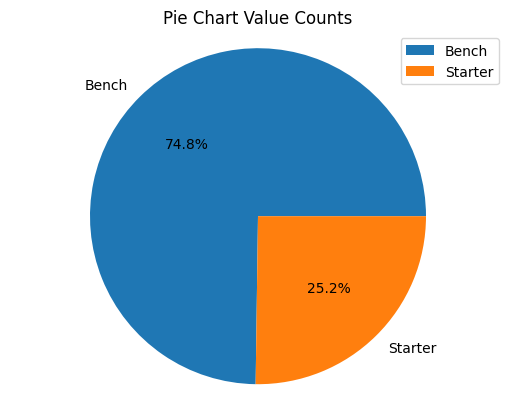

In [ ]:
value_counts = df['Target'].value_counts()
labels = ['Starter' if val == 1 else 'Bench' for val in value_counts.index]
plt.pie(value_counts, labels=labels, autopct='%1.1f%%')
plt.legend(labels, loc='upper right')
plt.axis('equal')
plt.title('Pie Chart Value Counts')
plt.show()



13. Menentukan x dan y

In [ ]:
x = df[['G','MP','FG','PTS']]
y = df['Target']


In [ ]:
y.dtypes

dtype('int64')

In [ ]:
x.dtypes

,0
G,float64
MP,float64
FG,float64
PTS,float64


14. Mengecek jumlah nilai yang ada dalam kolom dan berapa sering tiap nilai muncul

In [ ]:
df['Target'].value_counts()

,count
Target,
0,670
1,226


15. Membuat data train dan test

In [1]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


NameError: name 'x' is not defined

16. Standarisasi Data dengan Standar scaler

In [ ]:
Scaler = StandardScaler()
x_train_Scale = Scaler.fit_transform(x_train)
x_test_Scale = Scaler.transform(x_test)

In [ ]:
x_train_Scale

array([[-0.556642  ,  0.645335  ,  0.47276279,  0.4259924 ],
       [-0.51889998, -0.11535127, -0.30236466, -0.22671881],
       [-0.89632012,  1.81489014,  1.24789023,  1.57865261],
       ...,
       [-1.12277221, -0.94259759, -1.11624848, -1.12940452],
       [-0.74535207, -0.58127161, -0.53490289, -0.47669331],
       [-0.36793192,  1.05420387,  0.89908288,  1.06481613]])

In [ ]:
x_test_Scale

array([[-0.82083609,  1.54864994,  1.24789023,  1.32867811],
       [ 0.12271426, -0.8094775 , -0.49614652, -0.51835573],
       [-0.25470588, -0.48618583, -0.65117201, -0.69889287],
       [-0.89632012,  1.51061563,  1.20913386,  0.88427899],
       [ 1.29271669,  1.26339259,  1.79047945,  1.80085217],
       [ 1.48142677,  0.06531172, -0.22485191, -0.10173155],
       [ 1.63239482,  0.41712912, -0.03107005, -0.14339397],
       [-0.44341595, -0.75242602, -0.53490289, -0.56001815],
       [ 1.44368475,  0.49319774,  0.08519906,  0.16213042],
       [ 1.10400662,  0.8640323 ,  0.27898093,  0.56486712],
       [ 1.25497468,  0.90206661,  0.66654465,  0.55097965],
       [-1.12277221,  1.49159847,  0.97659563,  0.84261657],
       [ 0.38690836, -0.83800323, -0.68992838, -0.60168056],
       [ 1.25497468,  0.58828353,  0.04644269,  0.06491812],
       [ 0.12271426, -0.72390029, -0.3798774 , -0.2822687 ],
       [-1.16051422, -1.58918092, -1.07749211, -1.05996716],
       [-0.74535207, -1.

17.Logistic regresi untuk klasifikasi

In [ ]:
model = LogisticRegression()

model.fit(x_train_Scale, y_train)

LogisticRegression()

18. Model Prediksi

In [ ]:
y_pred = model.predict(x_test_Scale)

In [ ]:
y_test

,Target
711,0
440,0
525,0
722,0
39,1
...,...
845,0
25,1
84,1
10,1


19. Evaluasi Model

a. Confussion Matrix

In [ ]:
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)

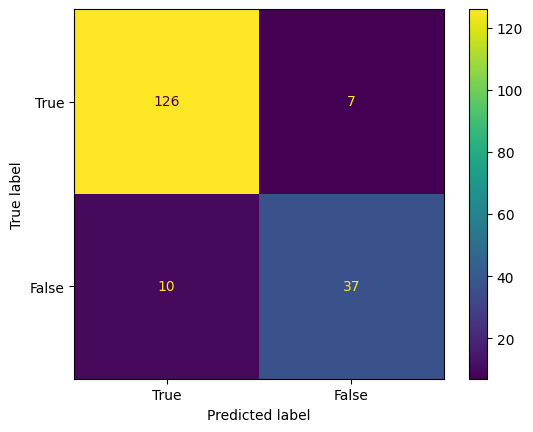

In [ ]:
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[True,False])
confusion_matrix_display.plot()
plt.show()

TP = 126   TN= 37
FP = 7    FN = 10

b. Akurasi, presisi dan recall

In [ ]:
print(f'Accuracy:{accuracy_score(y_test,y_pred)}')
print(f'Precision:{precision_score(y_test,y_pred)}')
print(f'Recall:{recall_score(y_test,y_pred)}')

Accuracy:0.9055555555555556
Precision:0.8409090909090909
Recall:0.7872340425531915


*   Distribusi Starter dan Bench Dengan data
Train

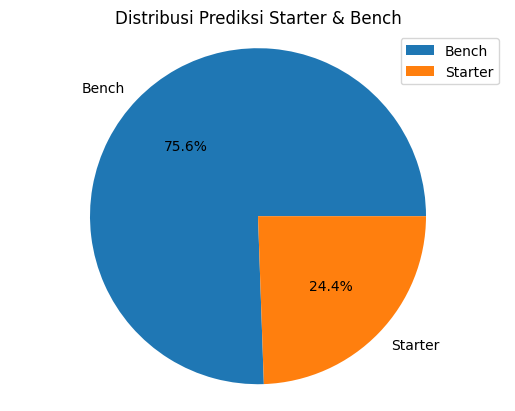

In [ ]:
y_pred_series = pd.Series(y_pred)
value_counts_pred = y_pred_series.value_counts()
labels_pred = ['Starter' if val == 1 else 'Bench' for val in value_counts_pred.index]

plt.pie(value_counts_pred, labels=labels_pred, autopct='%1.1f%%')
plt.legend(labels_pred, loc='upper right')
plt.axis('equal')
plt.title('Distribusi Prediksi Starter & Bench')
plt.show()

Akurasi = Skor yang mentukan jumlah keseluruhan prediksi yang benar

Presisi = Seberapa sering model benar saat prediksi positif

Recall = Metrik yang mengukur seberapa sering model berhasil mengidentifikasi true positif dari semua data yang seharusnya diklasifikasikan positif

20 Kesimpulan

Setelah melakukan perhitungan dengan StandardScaler, kemudian membangun model Logistic Regression dan mengevaluasinya menggunakan confusion matrix,akurasi,presisi,dan recall diperoleh insight sebagai berikut:

    Accuracy: 0.9056 (90.56%)

    Precision: 0.8409 (84.09%)

    Recall: 0.7872 (78.72%)

Artinya, model memiliki akurasi, presisi, dan recall yang cukup baik.

Berdasarkan confusion matrix didapatkan:

    True Positive (TP) = 126

    True Negative (TN) = 37

    False Positive (FP) = 7

    False Negative (FN) = 10

    Ini berarti dari total 180 data uji, sebanyak 163 data (126 TP + 37 TN) diprediksi dengan benar, sedangkan 17 data (7 FP + 10 FN) meleset.

Dengan hasil tersebut, dapat dikatakan bahwa model logistic regression yang telah dibangun cukup baik dalam melakukan klasifikasi.



21. Aplikasi ke Dataset Asli

Setelah mengetahui bahwa model sudah bekerja dengan baik berdasarkan evaluasi sebelumnya, di tahap ini saya ingin menggunakan model tersebut secara langsung pada keseluruhan dataset (tanpa melakukan split antara data latih dan data uji).

Tujuannya adalah untuk melihat secara menyeluruh siapa saja yang diprediksi masuk ke dalam kelompok starter dan siapa saja yang masuk kelompok bench berdasarkan data yang saya miliki.


.

a. Membuat dataframe untuk kolom prediksi

In [ ]:
prediksi = model.predict(Scaler.transform(df[['G','MP','FG','PTS']].astype(float)))
df['Prediksi'] = prediksi
df['Prediksi'] = pd.to_numeric(df['Prediksi'], errors='coerce')
df['Prediksi'].unique()

array([1, 0])

b. Dataframe Target

Sebelumnya Target sudah di buat tapi disini saya ingin memastikan saja nilai benar numerik tanpa nan

In [ ]:
df['Target'] = pd.to_numeric(df['Target'], errors='coerce')
df['Target'].unique()

array([1, 0])

c. Berapa kali 1 dan 0 muncul pada kolom target

In [ ]:
print(df["Target"].value_counts())

Target
0    670
1    226
Name: count, dtype: int64


d. Berapa kali 1 dan 0 muncul pada kolom prediksi

In [ ]:
print(df["Prediksi"].value_counts())

Prediksi
0    683
1    213
Name: count, dtype: int64


e. Mengkonversi atau mengubah data pada kolom prediksi dan target

    Dimana 0 bench
    1 adalah starter

In [ ]:
df['Target'] = df['Target'].map({1: 'Starter', 0: 'Bench'})
df['Prediksi'] = df['Prediksi'].map({1: 'Starter', 0: 'Bench'})

df['Target'].unique()

array(['Starter', 'Bench'], dtype=object)

In [ ]:
df['Prediksi'].unique()

array(['Starter', 'Bench'], dtype=object)

f. visualisasi kolom player,target, dan prediksi

In [ ]:
display(df[["Player", "Target", "Prediksi"]].head(20))

,Player,Target,Prediksi
0,Joel Embiid,Starter,Starter
1,Luka Dončić,Starter,Starter
2,Damian Lillard,Starter,Starter
3,Shai Gilgeous-Alexander,Starter,Starter
4,Giannis Antetokounmpo,Starter,Starter
5,Jayson Tatum,Starter,Starter
6,Stephen Curry,Starter,Starter
7,Kevin Durant,Starter,Starter
8,Kevin Durant,Starter,Starter
9,Kevin Durant,Bench,Bench


g. Mendownload dataset yang sudah memiliki kolom yang berisi pemain inti dan bench

In [ ]:
df.to_csv('dataset NBA_dengan_prediksi.csv', index=False)

from google.colab import files  # jika pakai Google Colab
files.download('dataset NBA_dengan_prediksi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>